In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from PIL import Image
import os 
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
#Retrieving the images and their labels
for i in range(classes):
   path = os.path.join(cur_path,'train',str(i))
   images = os.listdir(path)
   for a in images:
        try:
                image = Image.open(path+"/"+ str(a))
                image = image.resize((30,30))
                image = np.array(image)
                #sim = Image.fromarray(image)
                data.append(image)
                labels.append(i)
        except:
                print("Error loading image")


In [3]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_t1, X_t2, y_t1, y_t2 = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_t1.shape, X_t2.shape, y_t1.shape, y_t2.shape)
#Converting the labels into one hot encoding
y_t1 = to_categorical(y_t1, 43)
y_t2 = to_categorical(y_t2, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [4]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_t1.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x000002641E3F7510>>

In [6]:
eps = 15
traffic = model.fit(X_t1, y_t1, batch_size=64, epochs=eps, validation_data=(X_t2, y_t2))

Epoch 1/15
491/491 [==============================] - 159s 315ms/step - loss: 2.0490 - accuracy: 0.5066 - val_loss: 0.3927 - val_accuracy: 0.9068
Epoch 2/15
491/491 [==============================] - 157s 320ms/step - loss: 0.4860 - accuracy: 0.8609 - val_loss: 0.1178 - val_accuracy: 0.9719
Epoch 3/15
491/491 [==============================] - 354s 722ms/step - loss: 0.2919 - accuracy: 0.9179 - val_loss: 0.0921 - val_accuracy: 0.9791
Epoch 4/15
491/491 [==============================] - 160s 326ms/step - loss: 0.2161 - accuracy: 0.9405 - val_loss: 0.0617 - val_accuracy: 0.9860
Epoch 5/15
491/491 [==============================] - 160s 326ms/step - loss: 0.1818 - accuracy: 0.9505 - val_loss: 0.0416 - val_accuracy: 0.9902
Epoch 6/15
491/491 [==============================] - 158s 322ms/step - loss: 0.1476 - accuracy: 0.9591 - val_loss: 0.0393 - val_accuracy: 0.9904
Epoch 7/15
491/491 [==============================] - 156s 317ms/step - loss: 0.1454 - accuracy: 0.9598 - val_loss: 0.0378 -

In [7]:
model.save("my_model.h5")

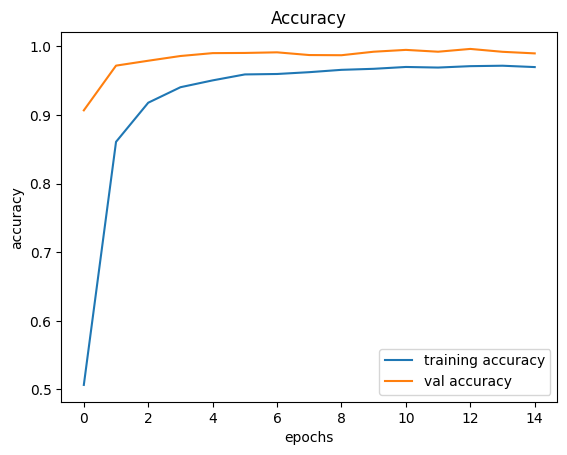

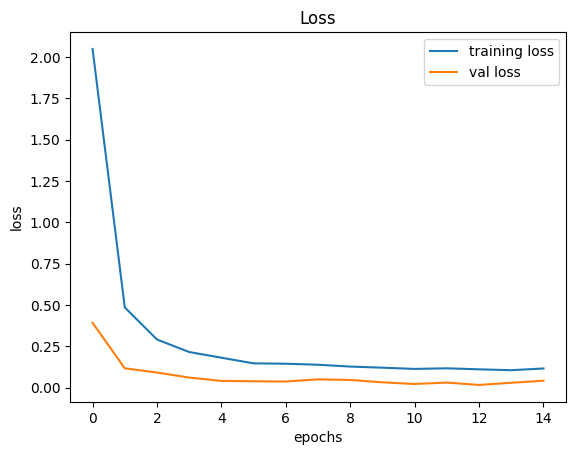

In [8]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(traffic.history['accuracy'], label='training accuracy')
plt.plot(traffic.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(traffic.history['loss'], label='training loss')
plt.plot(traffic.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
   image = Image.open(img)
   image = image.resize((30,30))
   data.append(np.array(image))
X_test=np.array(data)



In [10]:
labels

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [19]:
ypred = model.predict(X_test)

395/395 [==============================] - 16s 41ms/step


In [20]:
ypred

array([[2.7266858e-21, 6.5895818e-16, 1.4038198e-19, ..., 3.2540478e-14,
        1.9330711e-17, 9.6278761e-17],
       [8.4233666e-27, 1.0000000e+00, 3.4080128e-19, ..., 1.0838145e-29,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.1785378e-05, 1.0880911e-02, 8.1380625e-04, ..., 2.3891672e-03,
        1.4649702e-03, 3.7375483e-01],
       [4.4127537e-16, 3.1284180e-09, 1.6430777e-11, ..., 7.6630968e-10,
        1.4179572e-18, 1.1752815e-10],
       [5.1035364e-20, 2.5668330e-11, 4.1388633e-12, ..., 2.0338837e-12,
        1.3927731e-19, 5.6584370e-13]], dtype=float32)

In [21]:
ypreda=np.argmax(ypred,axis=1)

In [22]:
ypreda

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score
#Accuracy with the test data
print(accuracy_score(labels, ypreda))
model.save('traffic_classifier.h5')

0.9557403008709422
